<a href="https://colab.research.google.com/github/Nataliia-Kaguia/goit-ds-hw-05/blob/main/hw_05_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from urllib.parse import quote

# 1. Кодуємо URL
base_url = "https://uk.wikipedia.org/wiki/Населення_України"
encoded_url = quote(base_url, safe=':/')


In [ ]:
# 2. Завантажуємо таблиці
tables = pd.read_html(encoded_url)
print(f"Знайдено таблиць: {len(tables)}")


Знайдено таблиць: 72


In [ ]:
# 3. Знаходимо таблицю з 2019 роком
target_df = None
for tbl in tables:
    if any("2019" in str(col) for col in tbl.columns):
        target_df = tbl
        break

if target_df is None:
    raise ValueError("Таблиця з 2019 роком не знайдена!")


In [ ]:
# 4. Чистимо назви колонок
target_df.columns = [str(col).strip() for col in target_df.columns]


In [ ]:
# 5. Знаходимо колонку за 2019 рік
col_2019 = next(col for col in target_df.columns if "2019" in str(col))


In [ ]:
# 6. Перетворюємо дані в числовий формат
target_df[col_2019] = (
    target_df[col_2019]
    .astype(str)
    .str.replace(r"\s+", "", regex=True)
    .str.replace("—", "", regex=False)
    .str.replace(",", ".", regex=False)
    .replace("", np.nan)  # ← замість pd.NA
    .astype(float)
)


In [ ]:
# 7. Обчислюємо середнє та відбираємо регіони
mean_2019 = target_df[col_2019].mean()
above_avg = target_df[target_df[col_2019] > mean_2019]["Регіон"].tolist()


In [ ]:
# 8. Вивід результатів
print(f"\nСереднє значення у 2019: {mean_2019}")
print("Регіони з народжуваністю вище середнього:", above_avg)



Середнє значення у 2019: 80.20833333333333
Регіони з народжуваністю вище середнього: ['Волинська', 'Закарпатська', 'Івано-Франківська', 'Львівська', 'Одеська', 'Рівненська', 'Херсонська', 'Чернівецька', 'Київ', 'Україна']


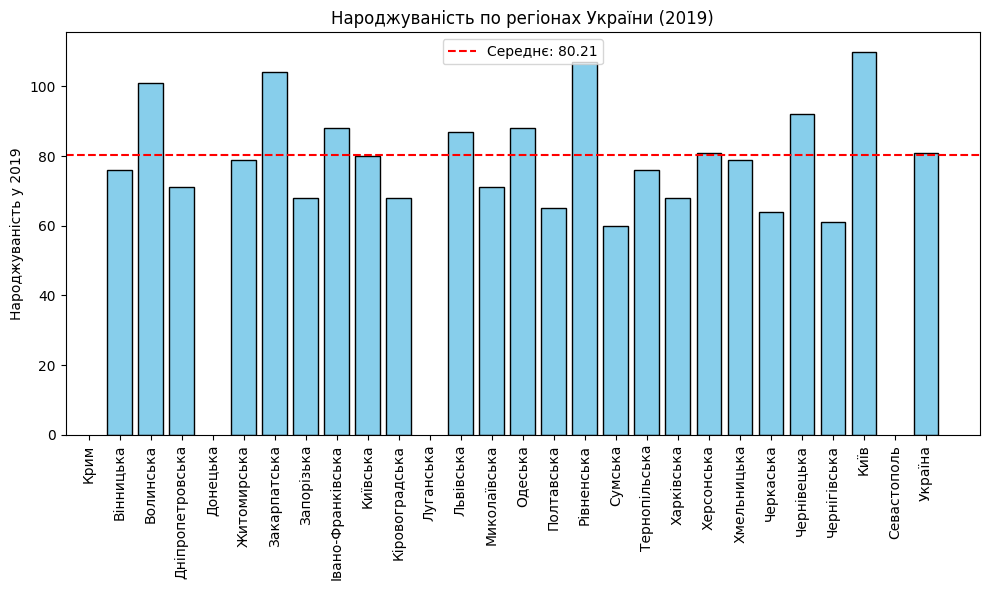

In [ ]:
# --- 📊 ВІЗУАЛІЗАЦІЇ ---
# 1. Bar chart
plt.figure(figsize=(10, 6))
plt.bar(target_df["Регіон"], target_df[col_2019], color="skyblue", edgecolor="black")
plt.axhline(mean_2019, color="red", linestyle="--", label=f"Середнє: {mean_2019:.2f}")
plt.xticks(rotation=90)
plt.ylabel("Народжуваність у 2019")
plt.title("Народжуваність по регіонах України (2019)")
plt.legend()
plt.tight_layout()
plt.show()


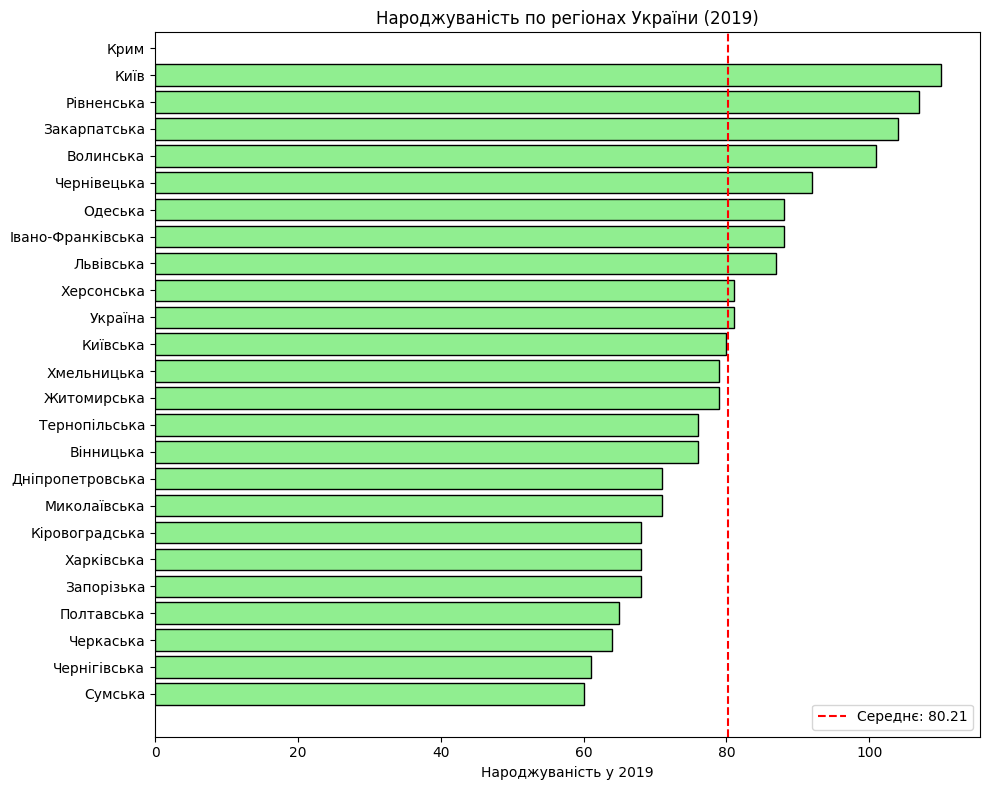

In [ ]:
# 2. Horizontal bar chart
plt.figure(figsize=(10, 8))
target_df_sorted = target_df.sort_values(col_2019)
plt.barh(target_df_sorted["Регіон"], target_df_sorted[col_2019], color="lightgreen", edgecolor="black")
plt.axvline(mean_2019, color="red", linestyle="--", label=f"Середнє: {mean_2019:.2f}")
plt.xlabel("Народжуваність у 2019")
plt.title("Народжуваність по регіонах України (2019)")
plt.legend()
plt.tight_layout()
plt.show()


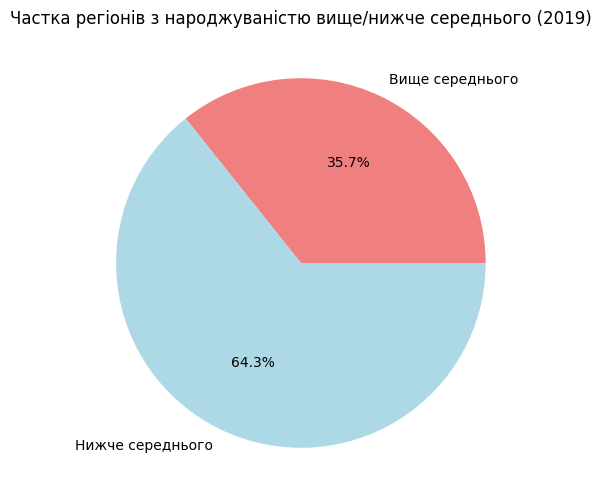

In [ ]:
# 3. Pie chart (вище/нижче середнього)
above_count = len(above_avg)
below_count = len(target_df) - above_count
plt.figure(figsize=(6, 6))
plt.pie([above_count, below_count],
        labels=["Вище середнього", "Нижче середнього"],
        autopct='%1.1f%%',
        colors=["lightcoral", "lightblue"])
plt.title("Частка регіонів з народжуваністю вище/нижче середнього (2019)")
plt.show()
